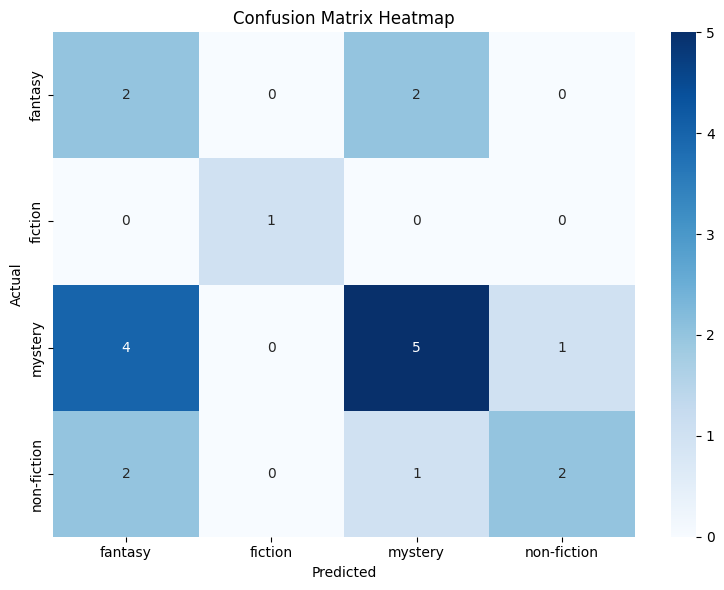

Accuracy: 0.5
Precision (macro avg): 0.6354166666666666
Recall (macro avg): 0.6

Classification Report:
               precision    recall  f1-score   support

     fantasy       0.25      0.50      0.33         4
     fiction       1.00      1.00      1.00         1
     mystery       0.62      0.50      0.56        10
 non-fiction       0.67      0.40      0.50         5

    accuracy                           0.50        20
   macro avg       0.64      0.60      0.60        20
weighted avg       0.58      0.50      0.52        20



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/book_genres.csv")  # Update path if necessary

# Prepare features and target
X = df[['author_popularity', 'book_length', 'num_keywords']]
y = df['genre']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision (macro avg):", precision)
print("Recall (macro avg):", recall)
print("\nClassification Report:\n", report)